# StackGP.plotModelResponseComparison
```{python}
StackGP.plotModelResponseComparison(model, inputData, targetData)
```

`plotModelResponseComparison` is a StackGP function that evaluates an evolved model using the input data and visually compares the predictions the ground truth target data. 

The function expects 3 arguments: _model_, _inputData_, and _targetData_

The argument is described below: 

* **model**: A StackGP model. 
* **inputData**: A 2D numpy array where each feature is a row. 
* **targetData**: A 1D numpy array containing the target data. 


---

First we need to load in the necessary packages

In [1]:
import StackGP as sgp
import numpy as np

## Overview

### Evolving a model and plotting the prediction quality

Here we evolve a model for a given data set and then plot the predictions and the target data to see how well it fits. 

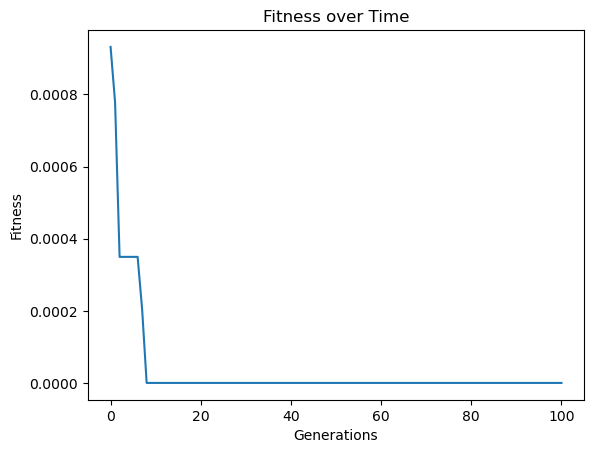

In [20]:
inputData=np.array([[1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
        3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
        4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
        6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
        7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
        8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]])
targetData=np.array([8.00128096, 7.62012521, 7.27291035, 6.95475935, 6.66177318,
       6.39078288, 6.13917633, 5.90477395, 5.6857376 , 5.48050239,
       5.28772495, 5.10624334, 4.93504579, 4.77324592, 4.62006286,
       4.4748052 , 4.3368579 , 4.20567152, 4.08075327, 3.96165954,
       3.84798965, 3.73938053, 3.63550223, 3.53605407, 3.44076131,
       3.3493723 , 3.26165604, 3.17739997, 3.09640816, 3.01849959,
       2.94350677, 2.87127441, 2.80165831, 2.73452437, 2.66974765,
       2.60721162, 2.54680744, 2.48843329, 2.43199381, 2.3773996 ,
       2.32456674, 2.27341633, 2.22387418, 2.17587039, 2.12933908,
       2.08421809, 2.0404487 , 1.99797541, 1.9567457 , 1.91670984,
       1.87782071, 1.84003362, 1.80330615, 1.76759801, 1.73287091,
       1.69908844, 1.66621591, 1.63422033, 1.60307023, 1.57273563,
       1.54318789, 1.51439971, 1.48634499, 1.45899878, 1.43233725,
       1.40633758, 1.38097794, 1.35623742, 1.332096  , 1.30853447,
       1.28553442, 1.2630782 , 1.24114884, 1.21973008, 1.19880629,
       1.17836243, 1.15838407, 1.13885732, 1.11976882, 1.10110572,
       1.08285563, 1.06500663, 1.04754724, 1.0304664 , 1.01375343,
       0.99739804, 0.98139031, 0.96572067, 0.95037986, 0.93535897])

models=sgp.evolve(inputData, targetData, tracking=True)

We can see that the model predictions perfectly overlap with the target data. 

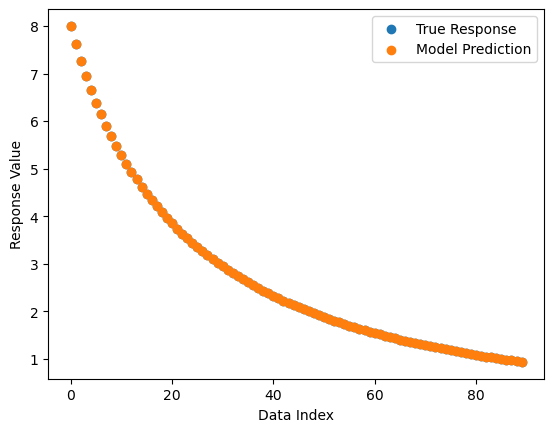

In [21]:
sgp.plotModelResponseComparison(models[0], inputData, targetData)

---
---

## Examples

This section provides some interesting examples to demonstrate how `plotModelResponseComparison` can be used. 

---

### Comparing fit of evolved models
We can use the plotModelResponseComparison function to determine how well a model fits the data and to compare the fits of multiple models.  

In [22]:
trainInputData = np.random.rand(4, 100)
randomModel = sgp.generateRandomModel(4, sgp.defaultOps(), sgp.defaultConst(), 10)
display(sgp.printGPModel(randomModel))
trainResponse = sgp.evaluateGPModel(randomModel, trainInputData)

0.367879441171442/(x3*(-0.183939720585721*x0 - 0.367879441171442*x1 + 0.183939720585721*x3 + 1)**2)

Now lets evolve a model population using the training data. 

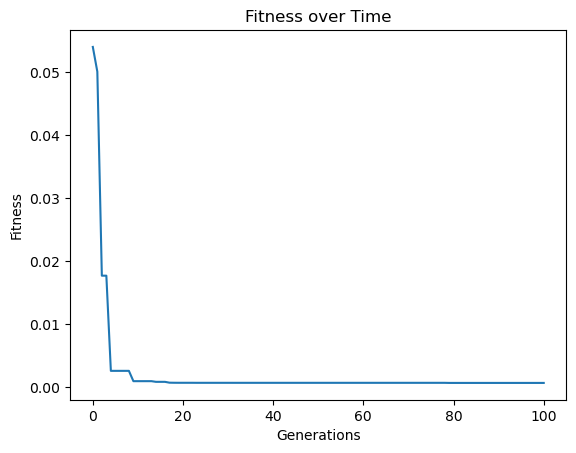

In [23]:
models=sgp.evolve(trainInputData, trainResponse, tracking=True)

Now lets pick a radnom model evolved from the population. 

In [32]:
pickedModel = models[np.random.randint(0,len(models))]
sgp.printGPModel(pickedModel)

7.00516710327608 - 8.4648379331487*x3

Now lets assess the fit of the model. 

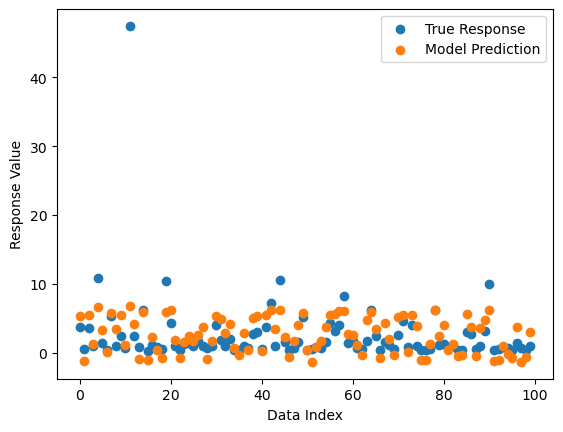

In [33]:

sgp.plotModelResponseComparison(pickedModel,trainInputData, trainResponse)

Now lets compare that to the best model in the population. 

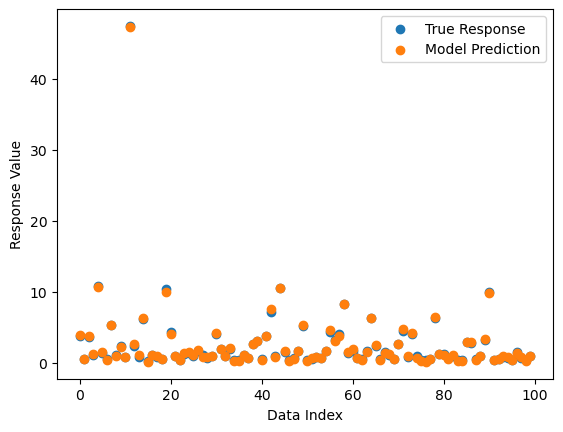

In [34]:
sgp.plotModelResponseComparison(models[0], trainInputData, trainResponse)